In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
df = kagglehub.dataset_download("rahulvyasm/medical-insurance-cost-prediction")


Using Colab cache for faster access to the 'medical-insurance-cost-prediction' dataset.


In [ ]:
import pandas as pd
import os
import kagglehub

df = pd.read_csv(f"{path}/medical_insurance.csv")

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


In [ ]:
print(df.tail())

      age     sex     bmi  children smoker     region      charges
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


In [ ]:
print("\nDescription:", df.describe())


Description:                age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Step 2: Remove Duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"\nRemoved {before - after} duplicate rows.")


Removed 1435 duplicate rows.


In [ ]:
# Step 3: Handle Missing Values
print("\nMissing values before handling:\n", df.isnull().sum())


Missing values before handling:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Step 4: Normalize the Data (Manual Normalization)
numeric_df = df.select_dtypes(include=[np.number])
normalized_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())
print("\nNormalized Data Sample:\n", normalized_df.head())


Normalized Data Sample:
         age       bmi  children   charges
0  0.021739  0.321227       0.0  0.251611
1  0.000000  0.479150       0.2  0.009636
2  0.217391  0.458434       0.6  0.053115
3  0.326087  0.181464       0.0  0.333010
4  0.304348  0.347592       0.0  0.043816


In [ ]:
# Step 5: Apply Different Scalers
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

minmax_scaled = pd.DataFrame(minmax.fit_transform(numeric_df), columns=numeric_df.columns)
standard_scaled = pd.DataFrame(standard.fit_transform(numeric_df), columns=numeric_df.columns)
robust_scaled = pd.DataFrame(robust.fit_transform(numeric_df), columns=numeric_df.columns)

print("\nMin-Max Scaled Data Sample:\n", minmax_scaled.head())
print("\nStandard Scaled Data Sample:\n", standard_scaled.head())
print("\nRobust Scaled Data Sample:\n", robust_scaled.head())


Min-Max Scaled Data Sample:
         age       bmi  children   charges
0  0.021739  0.321227       0.0  0.251611
1  0.000000  0.479150       0.2  0.009636
2  0.217391  0.458434       0.6  0.053115
3  0.326087  0.181464       0.0  0.333010
4  0.304348  0.347592       0.0  0.043816

Standard Scaled Data Sample:
         age       bmi  children   charges
0 -1.440418 -0.453160 -0.909234  0.297857
1 -1.511647  0.509422 -0.079442 -0.954381
2 -0.799350  0.383155  1.580143 -0.729373
3 -0.443201 -1.305052 -0.909234  0.719104
4 -0.514431 -0.292456 -0.909234 -0.777499

Robust Scaled Data Sample:
         age       bmi  children   charges
0 -0.833333 -0.297265      -0.5  0.629546
1 -0.875000  0.400713       0.0 -0.643134
2 -0.458333  0.309156       1.0 -0.414453
3 -0.250000 -0.914982      -0.5  1.057671
4 -0.291667 -0.180737      -0.5 -0.463364


In [ ]:
# Step 6: Central Tendency & Dispersion
stats = numeric_df.describe().T
stats["mode"] = numeric_df.mode().iloc[0]
stats["range"] = numeric_df.max() - numeric_df.min()
stats["var"] = numeric_df.var() # Calculate variance separately and add to stats
stats = stats[["mean", "50%", "mode", "std", "var", "range"]]
stats.rename(columns={"50%": "median", "std": "standard_deviation", "var": "variance"}, inplace=True)
print("\nMeasures of Central Tendency and Dispersion:\n", stats)


Measures of Central Tendency and Dispersion:
                   mean     median       mode  standard_deviation  \
age          39.222139    39.0000    18.0000           14.044333   
bmi          30.663452    30.4000    32.3000            6.100468   
children      1.095737     1.0000     0.0000            1.205571   
charges   13279.121487  9386.1613  1121.8739        12110.359656   

              variance        range  
age       1.972433e+02     46.00000  
bmi       3.721571e+01     37.17000  
children  1.453402e+00      5.00000  
charges   1.466608e+08  62648.55411  


In [ ]:
# One-hot encode categorical variables ('sex', 'smoker', 'region')
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

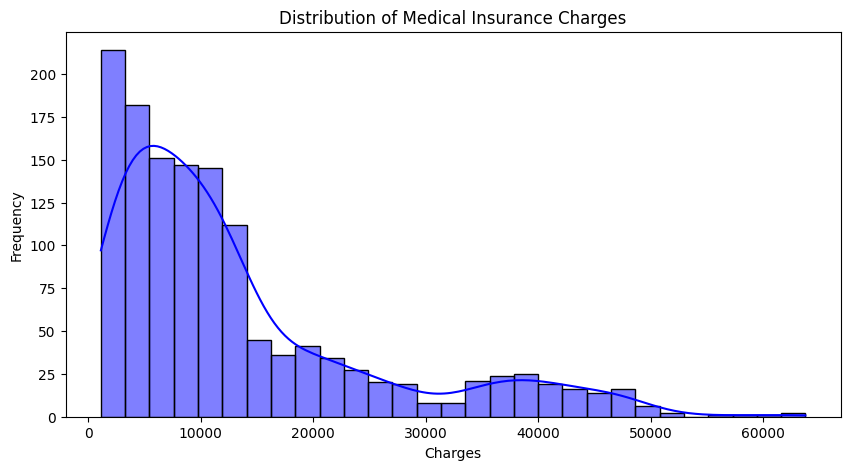

In [ ]:
# Exploratory Data Analysis (plots)

# Distribution of target variable 'charges'
plt.figure(figsize=(10,5))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

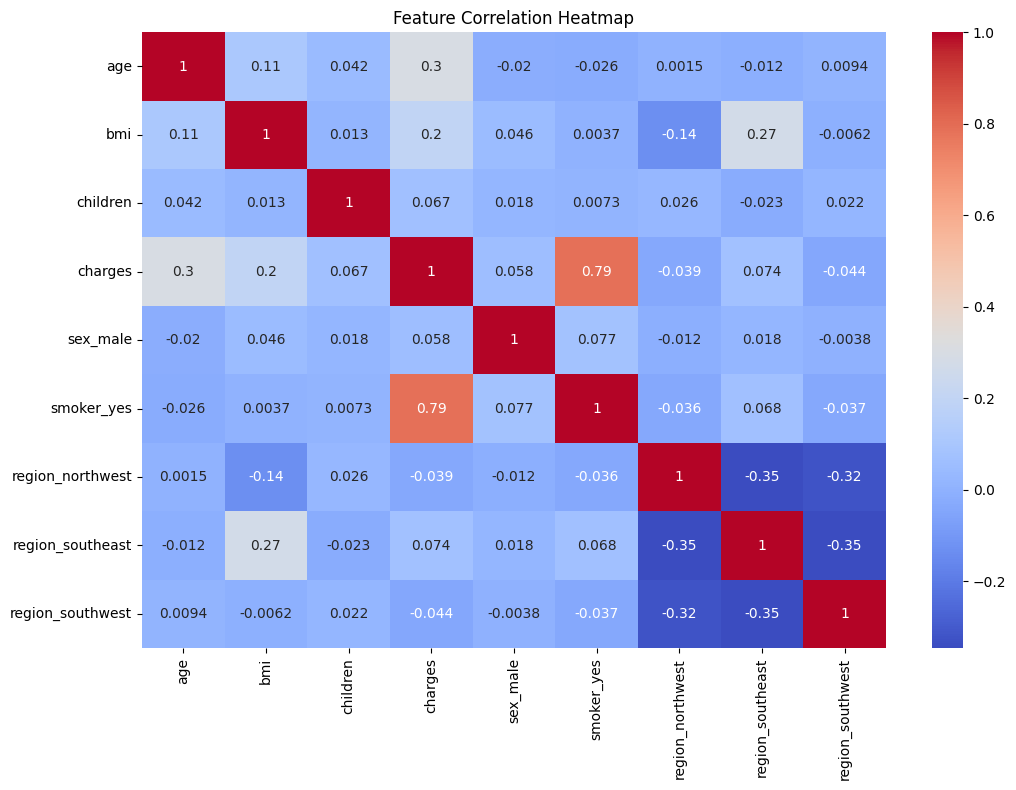

In [ ]:
# Heatmap of feature correlations
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Model 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Performance evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
# Calculate MSE first, then take the square root for RMSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression RMSE:", np.sqrt(mse_lr))

Linear Regression R2 Score: 0.8069287081198011
Linear Regression RMSE: 5956.342894363588


In [ ]:
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
# Calculate MSE first, then take the square root for RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest RMSE:", np.sqrt(mse_rf))

Random Forest R2 Score: 0.8796611113027272
Random Forest RMSE: 4702.4462291546515


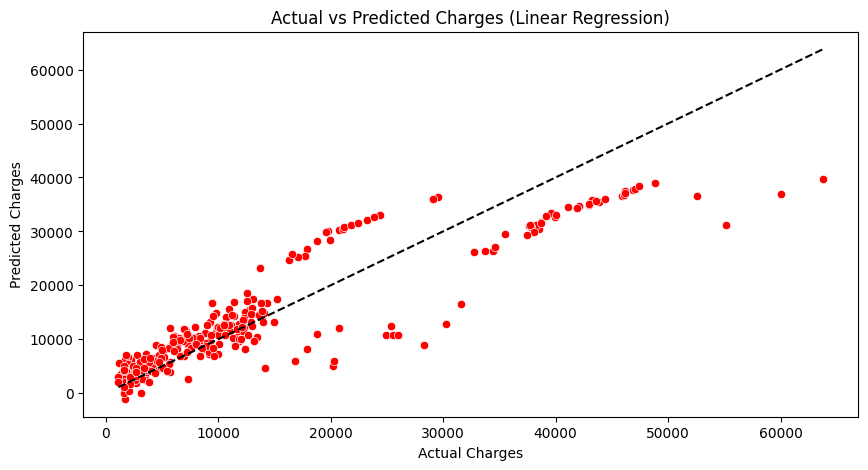

In [ ]:
# Visualizing Actual vs Predicted for Linear Regression
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_lr, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Linear Regression)')
plt.show()

/tmp/ipython-input-3043905811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette='viridis')


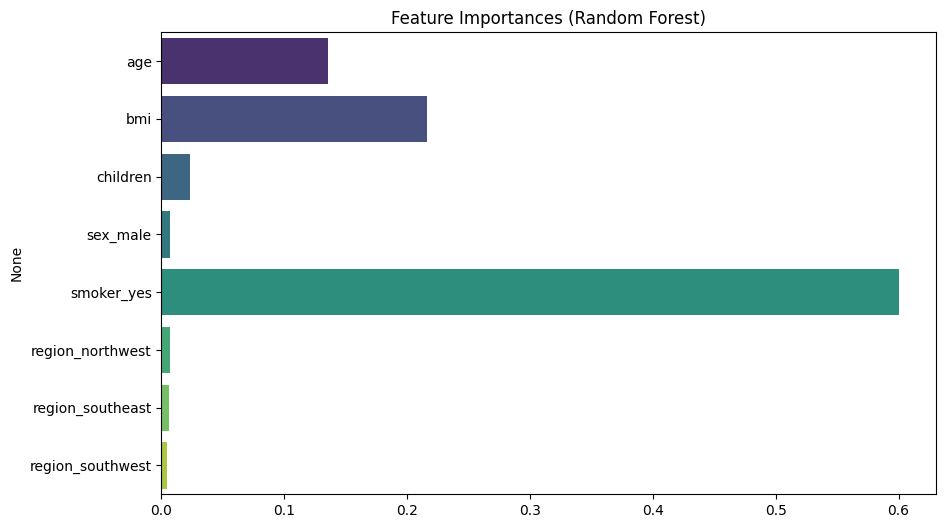

In [ ]:
# Feature Importance from Random Forest
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create classification target: High cost if charges > median, else Low cost
median_charge = df['charges'].median()
df['cost_category'] = (df['charges'] > median_charge).astype(int)  # 1 for High, 0 for Low

# Encode categorical features
df_encoded = pd.get_dummies(df.drop(['charges'], axis=1), drop_first=True)

# Features and classification target
X = df_encoded.drop('cost_category', axis=1)
y = df_encoded['cost_category']

In [ ]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.907
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       132
           1       0.89      0.93      0.91       136

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



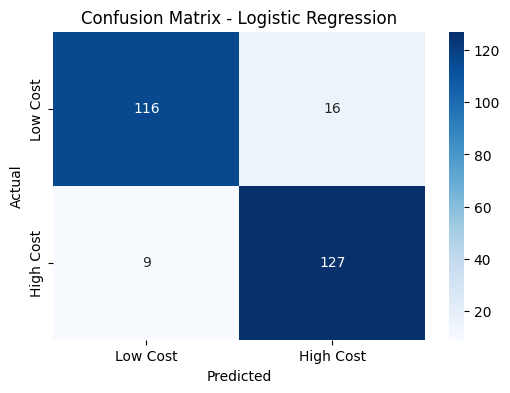

In [ ]:
# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Cost','High Cost'], yticklabels=['Low Cost','High Cost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)


Cluster Centroids:
 [[23.46822034 29.8453178   0.875       0.51483051  0.21398305  0.24364407
   0.27542373  0.23728814]
 [39.81498829 30.46620609  1.46604215  0.50117096  0.2295082   0.23887588
   0.27400468  0.24590164]
 [55.62100457 31.73738584  0.97260274  0.49771689  0.17123288  0.24429224
   0.26712329  0.24657534]]


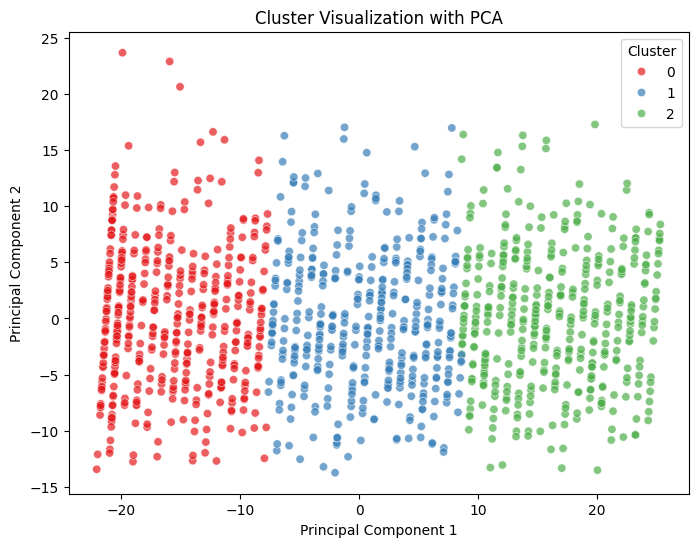

In [ ]:
# Add cluster labels to your dataset
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = cluster_labels

# 1. Analyze Cluster Centroids
print("Cluster Centroids:\n", kmeans.cluster_centers_)

# 2. Visualization using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels, palette='Set1', alpha=0.7)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 3. Evaluate Clusters with Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f'Silhouette Score for {k} clusters: {sil_score:.3f}')

Silhouette Score for 9 clusters: 0.401


In [ ]:
# 4. Profile Clusters
cluster_profiles = X_with_clusters.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
                age        bmi  children  sex_male  smoker_yes  \
Cluster                                                         
0        23.468220  29.845318  0.875000  0.514831    0.213983   
1        39.814988  30.466206  1.466042  0.501171    0.229508   
2        55.621005  31.737386  0.972603  0.497717    0.171233   

         region_northwest  region_southeast  region_southwest  
Cluster                                                        
0                0.243644          0.275424          0.237288  
1                0.238876          0.274005          0.245902  
2                0.244292          0.267123          0.246575  


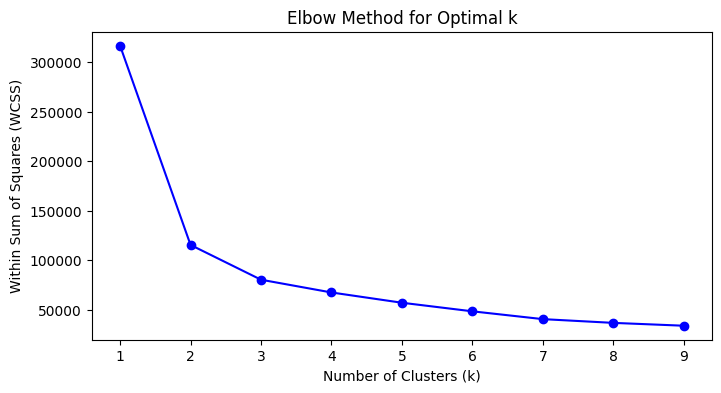

In [ ]:
# 5. Determine optimal number of clusters using Elbow Method
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()